# Práctica 2

## Kevin Rosario y Amaury Angeles

Telecom Churn Datasets

Cada línea representa un cliente y cada columna contiene los atributos de los planes del cliente. La base de datos posee los siguientes atributos:

• State: Estado del cliente

• Account length: Cuenta del cliente

• Area code: Código de área

• International plan: El cliente posee un plan internacional.

• Voice mail plan: El cliente posee un plan de voz.

• Number vmail messages: Numero de mensajes.

• Total day minutes: Total de minutos en el día.

• Total day calls: total de llamadas en el día.

• Total day charge: Total de cargos en el día.

• Total eve minutes: Total de minutos en la tarde.

• Total eve calls: Total de llamadas en la tarde.

• Total eve charge: Total de cargos en la tarde.

• Total night minutes: Total de minutos en la noche.

• Total night calls: Total de llamadas en la noche.

• Total night charge: Total de cargos en la noche.

• Total intl minutes: Total de minutos internacionales.

• Total intl calls: Total de llamadas internacionales.

• Total intl charge: Total de cargos internacionales.

• Customer service calls: Llamadas al servicio al cliente.

• Churn: Cliente canceló.


### Para abordar el tema del churn utilizaremos un modelo de regresión logística con regularización.

### Importamos librerias y las base de datos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:,.3f}'.format

df1 = pd.DataFrame(pd.read_csv("churn-bigml-80.csv"))
df2= pd.DataFrame(pd.read_csv("churn-bigml-20.csv"))
df = pd.concat([df1, df2])

### Se visualizan los campos, dimensiones y tipos de datos.

In [2]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,OH,107,415,No,Yes,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,NJ,137,415,No,No,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,OH,84,408,Yes,No,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,OK,75,415,Yes,No,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [6]:
cat_features = df.columns[df.dtypes=='object']
num_features = df.columns[df.dtypes!='object']

In [7]:
cat_features

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [8]:
num_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')

In [9]:
for col in cat_features:
    df[col] = pd.Categorical(df[col])

In [10]:
df.dtypes

State                     category
Account length               int64
Area code                    int64
International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
dtype: object

### Se eliliman variables irrelevantes

In [11]:
df = df.drop('Account length', axis=1)

### Se verifica la existencia de valores faltantes

In [12]:
df.isnull().sum().div(df.shape[0]).mul(100).sort_values(ascending=False)

Churn                    0.000
Total eve minutes        0.000
Area code                0.000
International plan       0.000
Voice mail plan          0.000
Number vmail messages    0.000
Total day minutes        0.000
Total day calls          0.000
Total day charge         0.000
Total eve calls          0.000
Customer service calls   0.000
Total eve charge         0.000
Total night minutes      0.000
Total night calls        0.000
Total night charge       0.000
Total intl minutes       0.000
Total intl calls         0.000
Total intl charge        0.000
State                    0.000
dtype: float64

### Se observa el % de churn en la base de datos y se transforma el dato en 0 y 1.

In [13]:
df.Churn.value_counts().div(df.shape[0] / 100)

False   85.509
True    14.491
Name: Churn, dtype: float64

In [14]:
df.Churn = df.Churn.astype('int')
df.Churn.value_counts().div(df.shape[0] / 100)

0   85.509
1   14.491
Name: Churn, dtype: float64

### Se verifican las clasificaciones de las variables categoricas.

In [15]:
for col in cat_features:
    print(col)
    print(df[col].unique())
    print('--------------------')

State
[KS, OH, NJ, OK, AL, ..., TN, PA, HI, ND, CT]
Length: 51
Categories (51, object): [KS, OH, NJ, OK, ..., PA, HI, ND, CT]
--------------------
International plan
[No, Yes]
Categories (2, object): [No, Yes]
--------------------
Voice mail plan
[Yes, No]
Categories (2, object): [Yes, No]
--------------------


### Se observan estádisticas descriptivas de las variables numericas.

In [16]:
df.describe(include='all')

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,"3,333.000",3333,3333,"3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000","3,333.000"
unique,51,nan,2,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,WV,nan,No,No,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,106,nan,3010,2411,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,437.182,NaN,NaN,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563,0.145
std,NaN,42.371,NaN,NaN,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315,0.352
min,NaN,408.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000,0.000
25%,NaN,408.000,NaN,NaN,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000,0.000
50%,NaN,415.000,NaN,NaN,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000,0.000
75%,NaN,510.000,NaN,NaN,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000,0.000


### Se construye la matriz de correlación y se revisan las correlaciones.


In [17]:
df.corr()

,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Area code,1.000,-0.002,-0.008,-0.010,-0.008,0.004,-0.012,0.004,-0.006,0.017,-0.006,-0.018,-0.024,-0.018,0.028,0.006
Number vmail messages,-0.002,1.000,0.001,-0.010,0.001,0.018,-0.006,0.018,0.008,0.007,0.008,0.003,0.014,0.003,-0.013,-0.090
Total day minutes,-0.008,0.001,1.000,0.007,1.000,0.007,0.016,0.007,0.004,0.023,0.004,-0.010,0.008,-0.010,-0.013,0.205
Total day calls,-0.010,-0.010,0.007,1.000,0.007,-0.021,0.006,-0.021,0.023,-0.020,0.023,0.022,0.005,0.022,-0.019,0.018
Total day charge,-0.008,0.001,1.000,0.007,1.000,0.007,0.016,0.007,0.004,0.023,0.004,-0.010,0.008,-0.010,-0.013,0.205
Total eve minutes,0.004,0.018,0.007,-0.021,0.007,1.000,-0.011,1.000,-0.013,0.008,-0.013,-0.011,0.003,-0.011,-0.013,0.093
Total eve calls,-0.012,-0.006,0.016,0.006,0.016,-0.011,1.000,-0.011,-0.002,0.008,-0.002,0.009,0.017,0.009,0.002,0.009
Total eve charge,0.004,0.018,0.007,-0.021,0.007,1.000,-0.011,1.000,-0.013,0.008,-0.013,-0.011,0.003,-0.011,-0.013,0.093
Total night minutes,-0.006,0.008,0.004,0.023,0.004,-0.013,-0.002,-0.013,1.000,0.011,1.000,-0.015,-0.012,-0.015,-0.009,0.035
Total night calls,0.017,0.007,0.023,-0.020,0.023,0.008,0.008,0.008,0.011,1.000,0.011,-0.014,0.000,-0.014,-0.013,0.006


In [18]:
corr = df.corr().stack()
corr.loc[corr < 1.0].sort_values(ascending=False)

Total day minutes       Total day charge          1.000
Total day charge        Total day minutes         1.000
Total eve minutes       Total eve charge          1.000
Total eve charge        Total eve minutes         1.000
Total night minutes     Total night charge        1.000
Total night charge      Total night minutes       1.000
Total intl charge       Total intl minutes        1.000
Total intl minutes      Total intl charge         1.000
Churn                   Customer service calls    0.209
Customer service calls  Churn                     0.209
Total day minutes       Churn                     0.205
Churn                   Total day minutes         0.205
Total day charge        Churn                     0.205
Churn                   Total day charge          0.205
Total eve minutes       Churn                     0.093
Churn                   Total eve minutes         0.093
Total eve charge        Churn                     0.093
Churn                   Total eve charge        

In [19]:
corr.loc['Churn'].sort_values()

Number vmail messages    -0.090
Total intl calls         -0.053
Total night calls         0.006
Area code                 0.006
Total eve calls           0.009
Total day calls           0.018
Total night minutes       0.035
Total night charge        0.035
Total intl minutes        0.068
Total intl charge         0.068
Total eve charge          0.093
Total eve minutes         0.093
Total day charge          0.205
Total day minutes         0.205
Customer service calls    0.209
Churn                     1.000
dtype: float64

### Se gráfica el churn respecto a las variables categoricas.

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


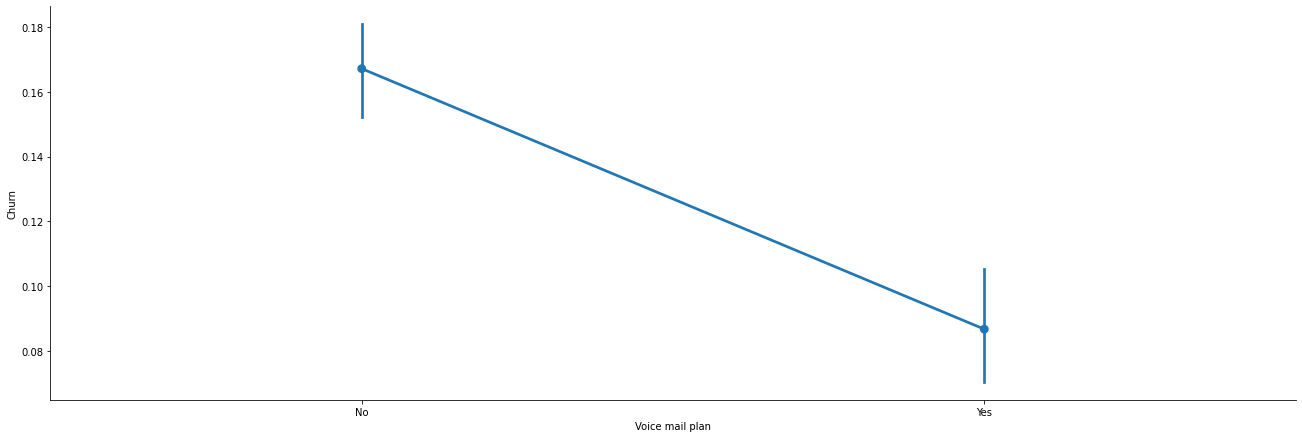

In [20]:
sns.factorplot(x='Voice mail plan', y='Churn', data=df, height=6, aspect=3);

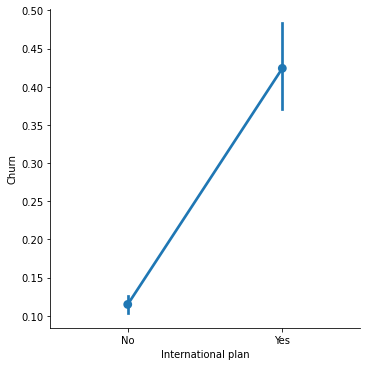

In [22]:
sns.factorplot(x='International plan', y='Churn', data=df);

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kevin\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


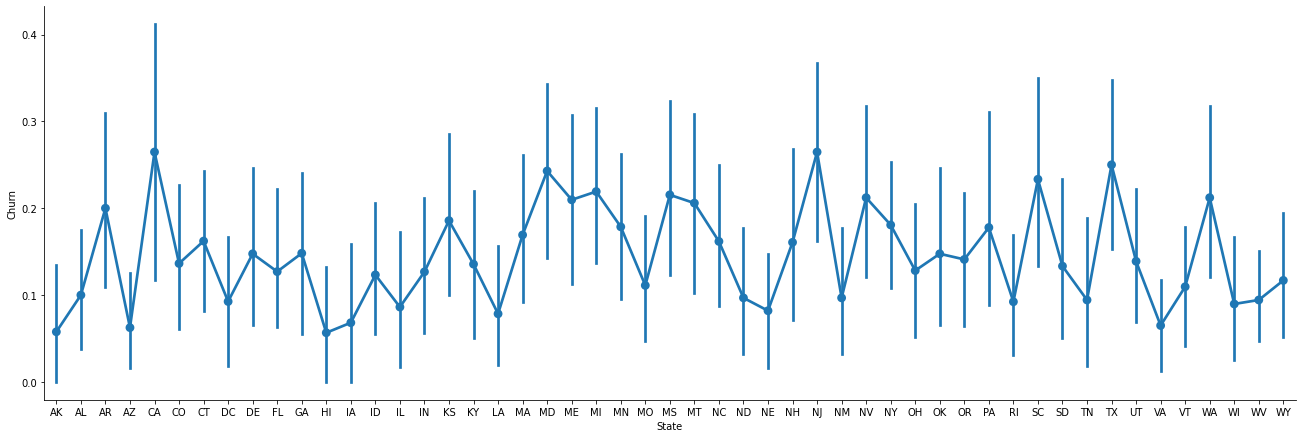

In [23]:
sns.factorplot(x='State', y='Churn', data=df, size=6, aspect=3);

### Se transforman las columnas en dummies.

In [24]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [25]:
df.international_plan = df.international_plan.eq('Yes').astype('int')
df.voice_mail_plan = df.voice_mail_plan.eq('Yes').astype('int')
df.churn = df.churn.astype('int')
df.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,415,0,1,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,0
1,OH,415,0,1,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,0
2,NJ,415,0,0,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,0
3,OH,408,1,0,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,0
4,OK,415,1,0,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,0


In [26]:
df = pd.get_dummies(df, columns=['state', 'area_code'], prefix_sep='__')
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,state__AK,state__AL,state__AR,state__AZ,state__CA,state__CO,state__CT,state__DC,state__DE,state__FL,state__GA,state__HI,state__IA,state__ID,state__IL,state__IN,state__KS,state__KY,state__LA,state__MA,state__MD,state__ME,state__MI,state__MN,state__MO,state__MS,state__MT,state__NC,state__ND,state__NE,state__NH,state__NJ,state__NM,state__NV,state__NY,state__OH,state__OK,state__OR,state__PA,state__RI,state__SC,state__SD,state__TN,state__TX,state__UT,state__VA,state__VT,state__WA,state__WI,state__WV,state__WY,area_code__408,area_code__415,area_code__510
0,0,1,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
df.dtypes

international_plan          int32
voice_mail_plan             int32
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int32
state__AK                   uint8
state__AL                   uint8
state__AR                   uint8
state__AZ                   uint8
state__CA                   uint8
state__CO                   uint8
state__CT                   uint8
state__DC                   uint8
state__DE                   uint8
state__FL                   uint8
state__GA                   uint8
state__HI                   uint8
state__IA     

### Se dividen las bases en variables explicativas y explicadas, se crean las bases de entrenamiento y validación y se estandarizan los valores.

In [28]:
X = df.drop('churn', axis=1)
y = df.churn

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [30]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

### Se crea el proceso iteractivo con GridSearchCV para buscar los mejores hyperparametros.

In [32]:
pipe_params = {'estimator__penalty': ['l1', 'l2'],
               'estimator__C': np.logspace(-4, 2, 100),
               }


pipe = Pipeline([('scaler', StandardScaler()),
                 ('estimator', LogisticRegression())])

rs_cv = GridSearchCV(pipe,
                           pipe_params,                           
                           scoring='roc_auc',
                           n_jobs=-2,
                           cv=3)

rs_cv.fit(X_train_sc, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-2,
             param_grid={'estimator__C': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6....
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02]),
                         'estimator__penalty': ['l1', 'l2']},
             scoring='roc_auc')

### Ver el score y los mejores parametros

In [33]:
rs_cv.best_score_

0.7979547569869441

In [34]:
rs_cv.best_params_

{'estimator__C': 0.011497569953977356, 'estimator__penalty': 'l2'}

In [35]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred=rs_cv.predict(X_test_sc)
y_pred_proba = rs_cv.predict_proba(X_test_sc)[:,1]

In [36]:
roc_auc_score(y_test, y_pred_proba)

0.8090613130765056

### Probamos un modelo de Randomforest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

rf_clas = RandomForestClassifier(n_estimators=10, 
                               max_features=0.8)
rf_clas.fit(X_train_sc, y_train)

RandomForestClassifier(max_features=0.8, n_estimators=10)

In [38]:
hyperparams_grid = {'n_estimators': randint(10, 500),
                    'max_features': np.arange(3, 9)}

rf_cla = RandomizedSearchCV(rf_clas,
                           hyperparams_grid,
                           n_iter=100,
                           scoring='roc_auc',
                           n_jobs=-2,
                           cv=3,
                           random_state=0)

rf_cla.fit(X_train_sc, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_features=0.8,
                                                    n_estimators=10),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'max_features': array([3, 4, 5, 6, 7, 8]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002860E0E0A30>},
                   random_state=0, scoring='roc_auc')

In [61]:
rf_cla.best_params_

{'max_features': 8, 'n_estimators': 82}

In [39]:
rf_cla.best_score_

0.9203943516889365

In [48]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred2=rf_cla.predict(X_test_sc)
y_pred_proba2 = rf_cla.predict_proba(X_test_sc)[:,1]
roc_auc_score(y_test, y_pred_proba2)

0.906312172183035

### Seleccionamos el modelo de Random Forest y motramos la Matriz de confusión y reporte de estádistica.

In [51]:
print(confusion_matrix(y_test, y_pred_proba2 > 0.5))
print(classification_report(y_test,y_pred_proba2 > 0.5))

[[570   0]
 [ 39  58]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       570
           1       1.00      0.60      0.75        97

    accuracy                           0.94       667
   macro avg       0.97      0.80      0.86       667
weighted avg       0.95      0.94      0.94       667



### Análisis de coeficientes

In [53]:
var_imp_series

total_day_minutes        0.134
total_day_charge         0.130
customer_service_calls   0.106
international_plan       0.062
total_eve_charge         0.061
total_eve_minutes        0.059
total_intl_minutes       0.043
total_intl_charge        0.042
total_night_minutes      0.039
total_intl_calls         0.039
total_day_calls          0.039
total_night_charge       0.038
total_eve_calls          0.034
total_night_calls        0.032
number_vmail_messages    0.024
voice_mail_plan          0.013
area_code__415           0.006
area_code__408           0.006
area_code__510           0.005
state__TX                0.004
state__MS                0.004
state__MD                0.004
state__NJ                0.004
state__SC                0.003
state__MT                0.003
state__NV                0.003
state__CT                0.003
state__MI                0.003
state__KS                0.003
state__CA                0.002
state__NM                0.002
state__MN                0.002
state__U

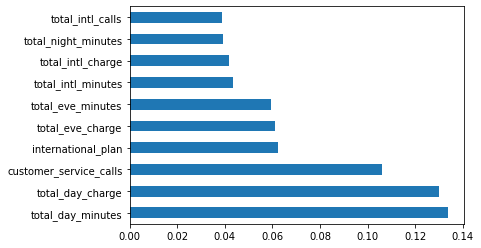

In [52]:
var_imp_series = pd.Series(rf_cla.best_estimator_.feature_importances_, 
                           index=X_train.columns)
var_imp_series.sort_values(ascending=False, inplace=True)
var_imp_series.head(10).plot.barh();

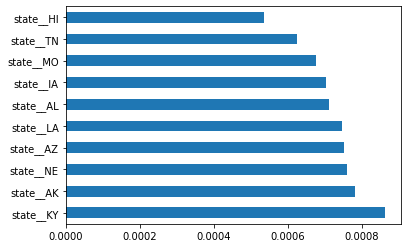

In [54]:
var_imp_series.tail(10).plot.barh();